In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\anemia.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [3]:
# cheching missing values
print(f"no. of samples, no. of features = {df.shape}")
print(df.isnull().sum())
df.info()

no. of samples, no. of features = (1421, 6)
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


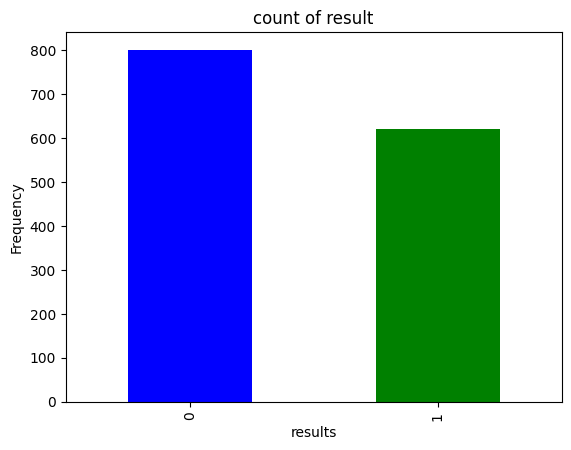

In [4]:
# checking whether output feature is imbalanced or not
results = df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel("results")
plt.ylabel("Frequency")
plt.title("count of result")
plt.show()

In [5]:
# EDA
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


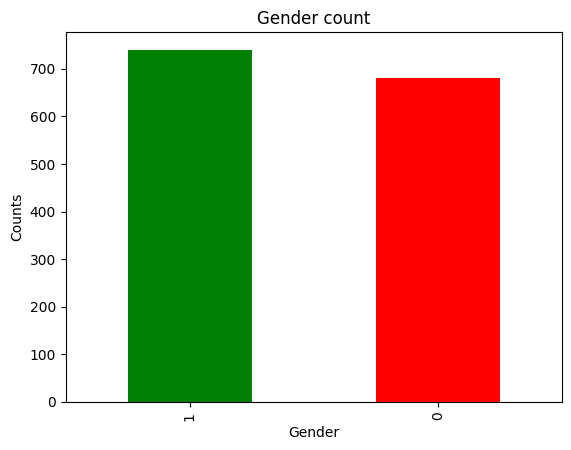

In [25]:
# Univariate Analysis
output = df['Gender'].value_counts()
output.plot(kind='bar',color=['green','red'])
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Gender count")
plt.show()

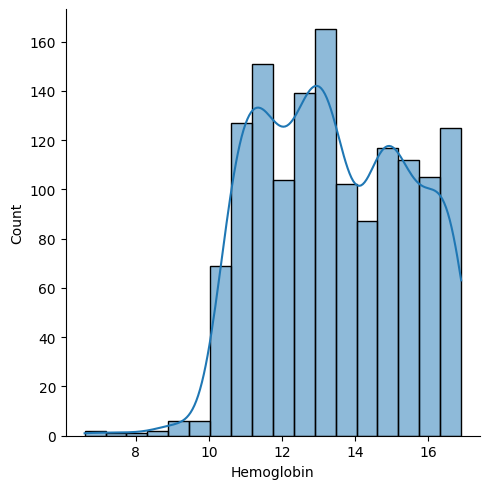

In [7]:
sns.displot(df['Hemoglobin'],kde=True)

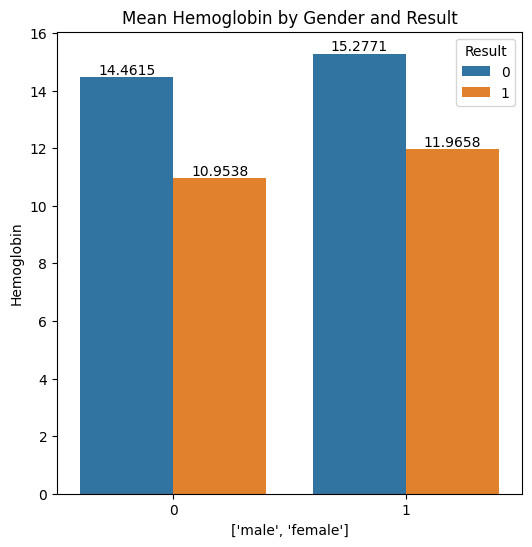

In [8]:
#Bivariate Analysis
plt.figure(figsize=(6,6))
ax = sns.barplot(y=df['Hemoglobin'],x=df['Gender'],hue=df['Result'],errorbar=None)
ax.set(xlabel=['male','female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Hemoglobin by Gender and Result")
plt.show()

from the above distribution, we understood that majority of males and females are not anemic i.e. they are healthy. This means that higher hemoglobin levels signify better health while lower levels indicate anemic disease. 

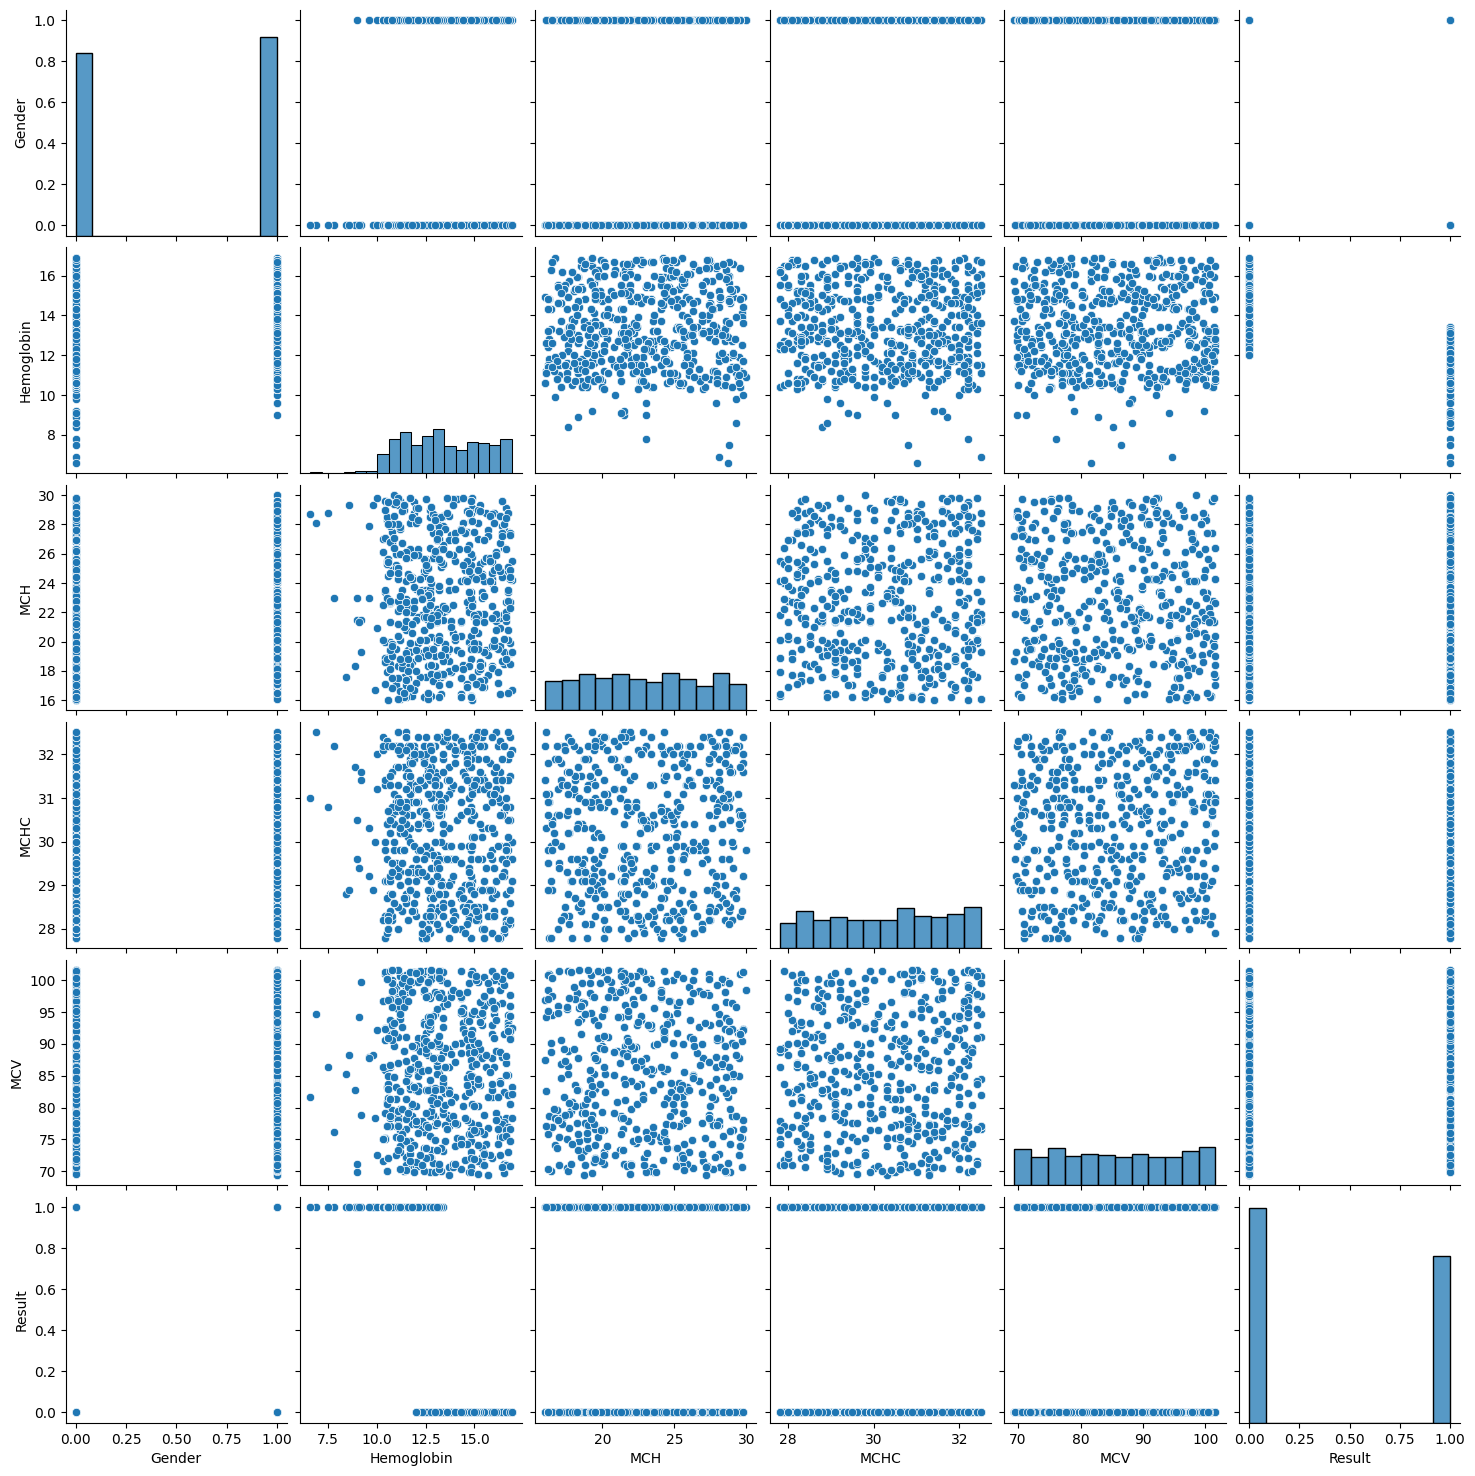

In [9]:
# Multivariate Analysis
sns.pairplot(df)

<Axes: >

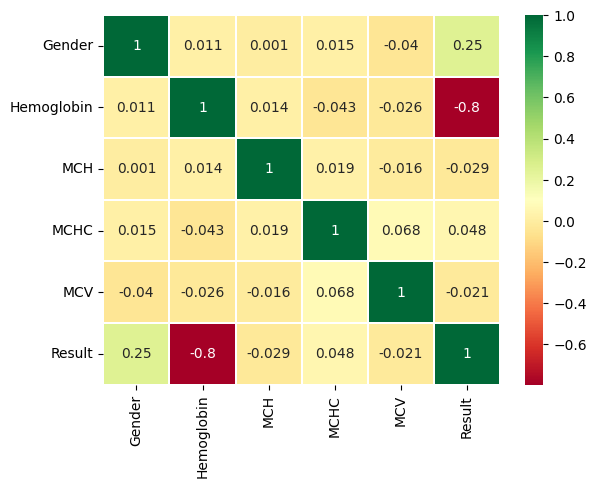

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


In [11]:
X = df.drop('Result',axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [12]:
y = df['Result']
y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(952, 5)
(469, 5)
(952,)
(469,)


In [14]:
# Importing various algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# importing metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [15]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)

print('accuracy=',acc_lr)
print(c_lr)
print(confusion_matrix(y_test,y_pred))


accuracy= 0.9893390191897654
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.98      1.00      0.99       203

    accuracy                           0.99       469
   macro avg       0.99      0.99      0.99       469
weighted avg       0.99      0.99      0.99       469

[[261   5]
 [  0 203]]


In [16]:
# Random Forest Clasifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

acc_RFC = accuracy_score(y_test,y_pred)
c_RFC = classification_report(y_test,y_pred)

print('accuracy=',acc_RFC)
print(c_RFC)
print(confusion_matrix(y_test,y_pred))


accuracy= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       203

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469

[[266   0]
 [  0 203]]


In [17]:
# Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

acc_DT = accuracy_score(y_test,y_pred)
c_DT = classification_report(y_test,y_pred)

print('accuracy=',acc_DT)
print(c_DT)
print(confusion_matrix(y_test,y_pred))

accuracy= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       203

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469

[[266   0]
 [  0 203]]


In [18]:
# Gaussian NB
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred = GNB.predict(X_test)

acc_GNB = accuracy_score(y_test,y_pred)
c_GNB = classification_report(y_test,y_pred)

print('accuracy=',acc_GNB)
print(c_GNB)
print(confusion_matrix(y_test,y_pred))

accuracy= 0.9445628997867804
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       266
           1       0.92      0.96      0.94       203

    accuracy                           0.94       469
   macro avg       0.94      0.95      0.94       469
weighted avg       0.95      0.94      0.94       469

[[248  18]
 [  8 195]]


In [19]:
# Support Vector Machine
SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

acc_SVM = accuracy_score(y_test,y_pred)
c_SVM = classification_report(y_test,y_pred)

print('accuracy=',acc_SVM)
print(c_SVM)
print(confusion_matrix(y_test,y_pred))

accuracy= 0.9147121535181236
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       266
           1       0.87      0.94      0.91       203

    accuracy                           0.91       469
   macro avg       0.91      0.92      0.91       469
weighted avg       0.92      0.91      0.92       469

[[238  28]
 [ 12 191]]


In [20]:
# Gradient Bossting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)

acc_GBC = accuracy_score(y_test,y_pred)
c_GBC = classification_report(y_test,y_pred)

print('accuracy=',acc_GBC)
print(c_GBC)
print(confusion_matrix(y_test,y_pred))

accuracy= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       203

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469

[[266   0]
 [  0 203]]


In [21]:
prediction = GBC.predict([[0,11.6,17.6,30.3,64.7]])
print(prediction)

[1]


c:\Users\User\OneDrive\Documents\Anemic Disease Detection System\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [22]:
if prediction == 1:
    print("You have Anemic disease")
elif prediction == 0:
    print("You are healthy")

You have Anemic disease


In [23]:
model = pd.DataFrame({"Model": ["Logistic Regression","Random Forest","Decision Tree","Gaussian NB","Support Vector Machine","Gradient Bossting Classifier"],
                      'Score': [acc_lr,acc_RFC,acc_DT,acc_GNB,acc_SVM,acc_GBC]})
model

,Model,Score
0,Logistic Regression,0.989339
1,Random Forest,1.000000
2,Decision Tree,1.000000
3,Gaussian NB,0.944563
4,Support Vector Machine,0.914712
5,Gradient Bossting Classifier,1.000000


In [24]:
import warnings
import pickle
pickle.dump(GBC,open("model.pkl","wb"))
